<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Projects/Decision_Tree_coded_model_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A simple decision tree Project
---

In this Project I am going to work with Iris data set, using the idea of a simple decision tree class.  I am going to code a simple decision tree which will be used to calculated probabilities to make decisions about whether a row of given data would be classified as Iris-virginica or Iris-setosa or Iris-versicolor based on sepal and petal dimensions.  


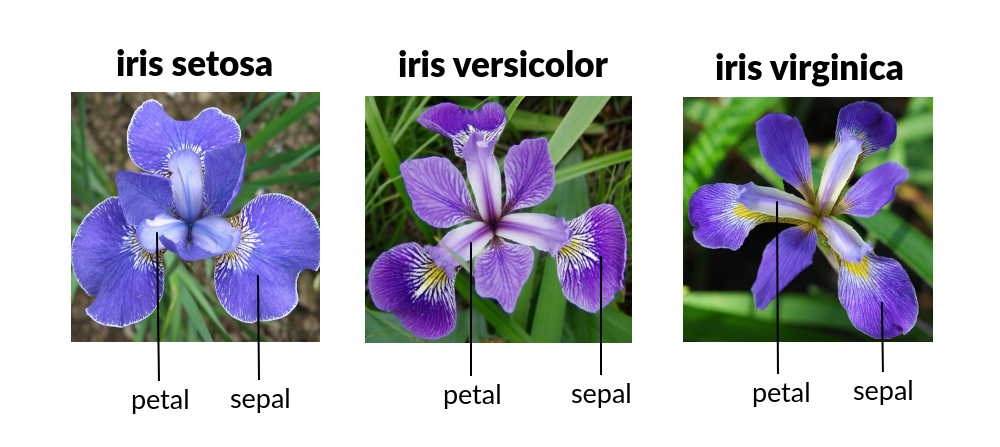

#About the data set
---
Iris Flower dataset is a University of California, Irvine (UCI) Database from their Machine learning depository.

UCI machine learning repository: The UCI Machine Learning Repository is a collection of databases, and data generators that are used by the machine learning community to do experiments and analysis of machine learning algorithms on data.

For the sake of this project, it has been cleaned and uploaded to github at  https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv

#*In this project I aim to*
---

*  Divide the data set into train and test data - 70% of the rows for training and 30% for testing
*  Find effective indicators such as the mean, the median etc for each of the 4 columns - petal length, petal width, sepal length and sepal width.
*  Calculate the proportion of each column that are above or below the indicator chosen. Match that to each species (for example, proportion of Iris-virginica that have petal length above mean and proportion of the same species that are below mean etc)
*  Using the proportion from the previous step, infer how to effectively identify most of each species.  That is if the proportion of Iris-virginica abive mean is 1, then all of Iris-virginca have petal length on or above average. Similarly 0s can help us identify as definitely not that species. 
*  Code the decision tree model into a function that will return whether or not a row in the test set is predicted to be of given Iris species
*  use the decision tree function to predict, for each row in the test set, if the species will be Iris-virginicia or Iris-versicolor or Iris-setosa with a set of nested if statements to classify
*  compare the predicted values against the actual values in the test set - what proportion were predicted correctly?
* repeat the above processes for the next indicator e.g. median
* compare the proportion for each indicator to identify best indicator - let's say best indicator that which at least predicts 3/4th of the test data correctly!
* If none of the indicators work well - try to find an alternative method that will identify the species. Sometimes, a more complex decision tree may be needed.


##Investigate the iris data set
---
Let's start by looking at the data.  We are going to use a data set that contains data on iris flowers.

First upload the data in git hub, https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv into a dataframe called iris_data

The columns in the CSV file do not have headings, so, will have to be added.


In [292]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)
iris_data

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Now that I have the data, I want to:

*  Take a look at the column info (how many columns, what type of data, any missing data?)
*  Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included
*  Find out how many unique values there are in the species column
*  Find out the maximum, minimum, median and upper and lower quartile values in each of the columns

*What does the first 5 rows of the data set look like?*

In [293]:
iris_data.head() # first 5 entries of the dataset

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Looking at the technical summary:

In [294]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Let's get some stats.

In [295]:
iris_data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


From looking at the data set there seems to 150 rows of data split between the 3 species in total. But how many of the data corresponds to each of teh species? Let's find that out.

In [296]:
iris_data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

So there are exacctly 50 data points for each of the species.

Next part is cleaning up the data set. Let's look for any null values that will make it problematic to work with numpy.

In [297]:
iris_data.isnull().values.any()

False

So there are no null values at all in any of the columns - what a lovely data to work with!

I want to see how the distribution of each of the four measurements look like for the 3 species. I am aware that with just 150 data points, it may very well be a small sample data set but I would like to get an idea of how the values are distributed. I can also use .describe() for each of the species to get the mean and std. dev to get a sense of quantity for each of the species. 

<Figure size 1296x1152 with 0 Axes>

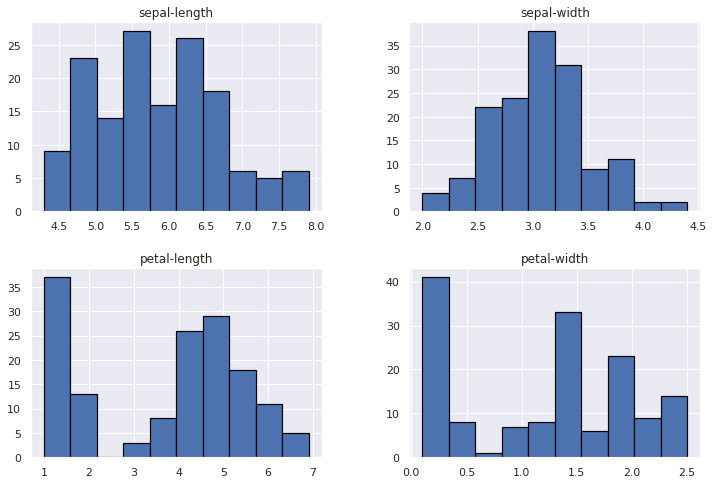

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 16))

iris_data.hist(edgecolor='black', linewidth=1.2)
plt.show()

We can now get an overall picture of each of the 4 measurements for all species together. It might be a good idea to look two of the measurements at a time, for example petal length and petal width etc.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


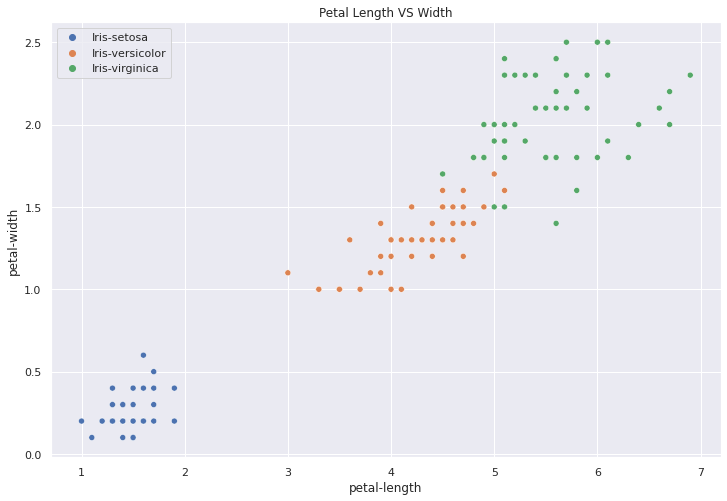

In [299]:
x = iris_data["petal-length"]
y = iris_data["petal-width"]
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(x, y, data=iris_data, hue='species')
plt.legend(loc='upper left');
plt.title("Petal Length VS Width");

Similarly let's plot sepal length and sepal width next.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


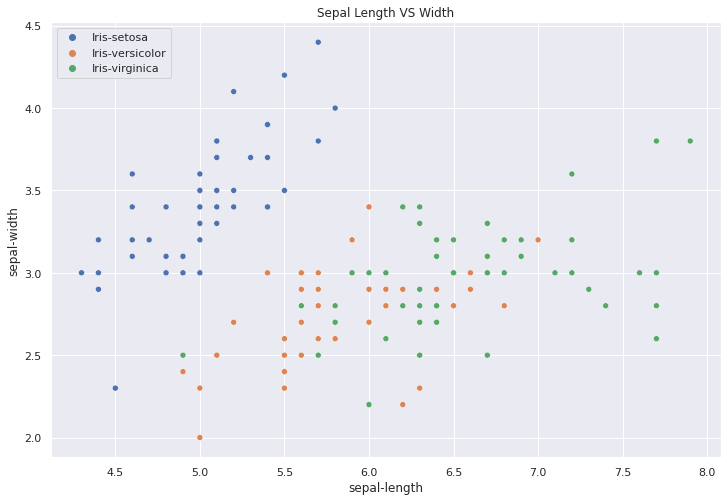

In [300]:
x1 = iris_data["sepal-length"]
y1 = iris_data["sepal-width"]
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(x1, y1, data=iris_data, hue='species')
plt.legend(loc='upper left');
plt.title("Sepal Length VS Width");

Looking at the above 2 figures, petal features are better at separating the species compared to the sepal features. Following the same logic, let us look at all the combination of 2 variables at a time (bivariate analysis). Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis.[1] It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them. (see https://en.wikipedia.org/wiki/Bivariate_analysis for more information). I will be using seaborn to do the bivariate analysis for sepal and petal features. 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


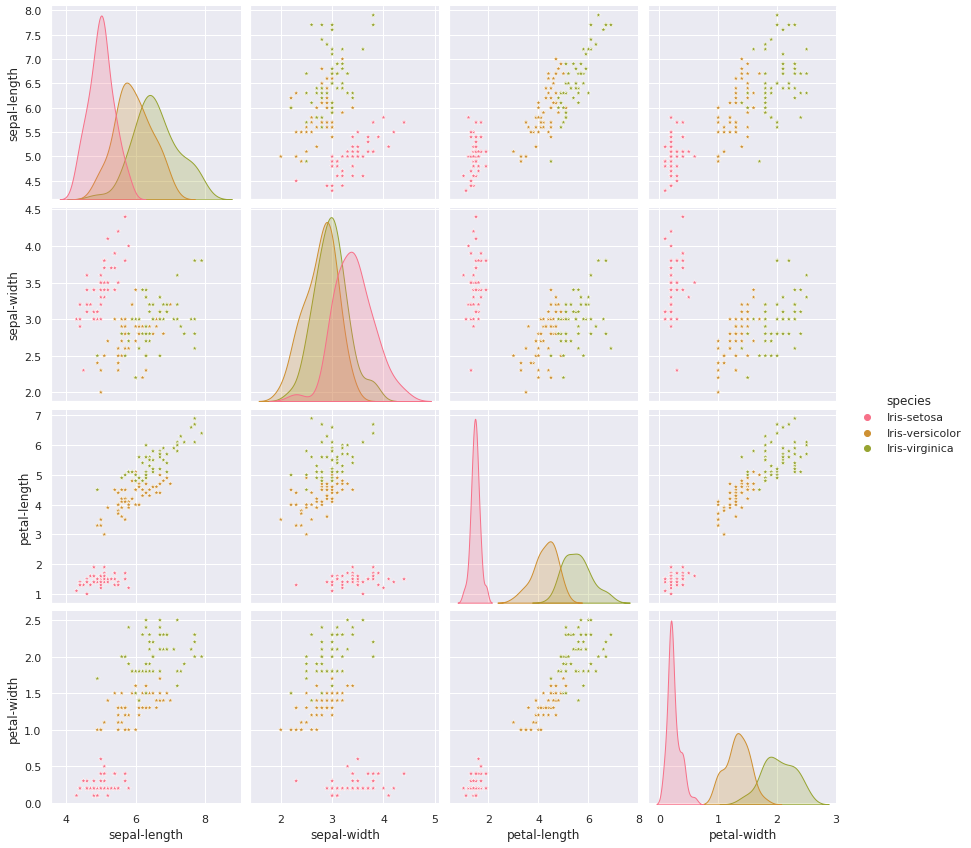

In [301]:
sns.set_palette('husl',8) # got this from https://seaborn.pydata.org/tutorial/color_palettes.html

bi_var_plot = sns.pairplot(iris_data,hue="species",diag_kind="kde", markers='*',size =3 ); #Using markers and pair plotting from https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.set_style("darkgrid")
plt.show()

From the above plots we see:
1. There is a high correlation and a predictable relationship between the pairs, particularly, between peatl length and petal width.
2. The relationship between pairs of features of Iris-Setosa (in pink) is distinctly different from those of the other two species.
3. There is an overlap in all pairwise relationships of the other two species, Iris-Versicolor (yellow-brown) and Iris-Virginia (green).

Since there is a strong suggestion of correlation between the features, let us do a correlation test to see how features are correlated. So here is a heatmap using seaborn.

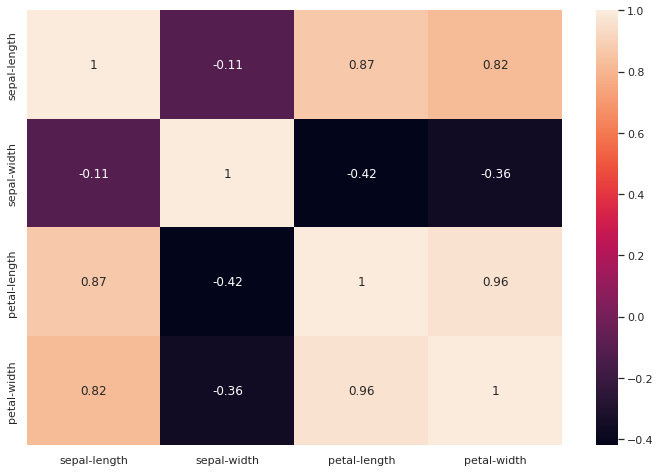

In [302]:
import seaborn as sns
sns.heatmap(iris_data.corr(), annot = True);

The above results shows that there is indeed a strong correlaion between petal length and petal width (0.96) and sepal width is very weekly correlated with all other features.

So far, we have explored the data sets and have come to the following conclusion:
1. There are 4 features for 3 types of Iris species.
2. There are 50 data points for each of the Iris species (150 in total).
3. Among the 4 features, petal length and width are strongly correlated with each other while sepal width is weekly correlated with all other features.
4. Iris-setosa can be easily distinguished from the other two species based on petal length and petal width.
5. The other two species, Iris-versicolor and Iris-virginica have overlapping features, making it harder to distinguish between them.

This means more than one feature may be needed to distinguish all the 3 species of Iris. Hence, I need to build a decision tree on how to spearate the species. I will split the data into test and train data sets (with 30%-70% repectively), try out my decision tree/s (in case, I need to try out a different one) on teh train data set and the test out to see what proportion of test data was identified correctly.

##Splitting Iris data into train and test sets
---

I will be split the Iris data set into and 70% train, 30% test data sets respectively and this split is done by random selection of data from the Iris data set.  From now on I will just use the train data set to try out decision tree and then use test data set to test my results.


In [303]:
# import the train_test_split function
from sklearn.model_selection import train_test_split

# create the classification variables from the all columns
train_orig, test = train_test_split(iris_data, test_size=0.30) # By specifying test data proportion tarin data is automatically fixed to 1-test_size
train_orig.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.00000,105.000000,105.000000
mean,5.815238,3.06000,3.732381,1.200952
std,0.836520,0.44389,1.782365,0.780470
min,4.300000,2.00000,1.100000,0.100000
25%,5.100000,2.80000,1.500000,0.300000
50%,5.700000,3.00000,4.400000,1.400000
75%,6.400000,3.30000,5.100000,1.800000
max,7.700000,4.40000,6.700000,2.500000


No we have 105 data points in our train data set which is exactly 70% of the total data points.

### Decision Tree assumptions and classification
---

Let's make some assumptions based on the data

1.  Iris-setosa, Iris-versicolor, Iris-virginica are the full range of types of iris to be analysed
2.  Although this is a small data set, the means are fairly representative

With these in mind, let's start by classifying sepal/petal size into long/short and wide/narrow with values on or above the mean (average) taken as long or wide and those below as short or narrow.

This is a starting point.  We will be trying to find a value (indicator) for each column where rows on or above do not contain any of a particular species, this might indicate that this column is a good (if not rough) indicator of species. I can then base my decision tree on a set of columns to separate the species. So, 

1. first I will calculate, and store the means of the four columns.

2. Then create a new dataframe with the numeric columns encoded to show a 1 for any value that is above the mean for its column and 0 for any that isn't.

3. This means it is easy to check to see if a large proportion or all of a species' feature is 1 or 0 and I can identify that spieces based on that column value. 

Below is the code for encoding columns in iris_data based on their mean values. If the feature value in a columns is on or above mean, the code will encode that value to be 1 otherwise, it will be 0. I have copied the original data into a new data frame and made any changes to the new data frame. This will allow me to keep a copy of the original intact for future use.

In [304]:
# get the mean for each column and apply a function to encode into 1 (above mean) and 0 (mean or below mean)
def encode(df, **kwds):
  cutoff = kwds['indicator']
  key = kwds['key']
  if df[key] > cutoff:
    return 1
  else:
    return 0

train = train_orig.copy()
# run the function for each column so that each of the four columns are encoded, then drop the original columns, saving as a new dataframe
train['sepal-length'] = train.apply(encode, axis=1, key='sepal-length', indicator=train_orig['sepal-length'].mean())
train['sepal-width'] = train.apply(encode, axis=1, key='sepal-width', indicator=train_orig['sepal-width'].mean())
train['petal-length'] = train.apply(encode, axis=1, key='petal-length', indicator=train_orig['petal-length'].mean())
train['petal-width'] = train.apply(encode, axis=1, key='petal-width', indicator=train_orig['petal-width'].mean())

print(train.describe())


       sepal-length  sepal-width  petal-length  petal-width
count    105.000000   105.000000    105.000000   105.000000
mean       0.457143     0.457143      0.609524     0.571429
std        0.500549     0.500549      0.490197     0.497245
min        0.000000     0.000000      0.000000     0.000000
25%        0.000000     0.000000      0.000000     0.000000
50%        0.000000     0.000000      1.000000     1.000000
75%        1.000000     1.000000      1.000000     1.000000
max        1.000000     1.000000      1.000000     1.000000


Now I have the mean, std, count etc for the four possible features of Iris to identify which species it belongs to. I will test out a few options like mean, median and upper quartile as "indicators" to try and separate the species and see which one fares best.

### Mean as Indicator - Calculate the proportion of values on or above the mean that are of each species

First we will calculate, mean/average for each dimension column (`sepal-length, sepal-width, petal-length, petal-width`) to see what proportion of values in that column, where the value is on or above the mean, are classified as `Iris-virginica` or 'Iris-versicolor' or 'Iris-Setosa'

We will do this by filtering all the records in each column of the the `train` set that are on or above the mean and match the species .  Then use the outcome to calculate the proportion of the full `train` set for which a value on or above the mean that are of each species.

First I will start with 'Iris-virginica'

The following code will filter for values in the `sepal-length` column being on or above the mean and the species column being `Iris-virginica`.  Then divide the count of rows in this filtered dataset by the count of rows in a second data set, filtered for just the value being on or above the mean.

Similarly, do the same as above for all four columns, for `Iris-virginica`  (4 operations).

Print the results to see which columns look like they might most reliably predict the species as `Iris-virginica` (the result is as close as possible to 1).  The highest numbers may indicate the most reliable indicators, but we will do some more before coming to this conclusion.

In [305]:
# calculate the proportion of results where the value is on or above mean that are of the species Iris-virginica
def get_prop_above(df, spec,column):
  train_spec = df[(df[column]== 1) & (df['species']==spec)][column].count()
  train_all = df[df[column]== 1][column].count()
  prop_spec = train_spec/train_all
  return prop_spec

vir_sep_len = get_prop_above(train, 'Iris-virginica', 'sepal-length')
vir_sep_width = get_prop_above(train, 'Iris-virginica', 'sepal-width')
vir_petal_len = get_prop_above(train, 'Iris-virginica', 'petal-length')
vir_petal_width = get_prop_above(train, 'Iris-virginica', 'petal-width')

print("Proportion using Sepal length using above mean: ", vir_sep_len, "\nProportion using Sepal width using above mean: ",vir_sep_width, "\nProportion using Petal length using above mean: ",vir_petal_len, "\nProportion using Petal width using above mean: ", vir_petal_width)

Proportion using Sepal length using above mean:  0.6458333333333334 
Proportion using Sepal width using above mean:  0.25 
Proportion using Petal length using above mean:  0.5625 
Proportion using Petal width using above mean:  0.6


From the proportion test, we see none of the numbers are anywhere near 1. Particularly, sepal width shows that very small proportion of Iris-virginica has sepal-width above or equal to mean. However, 0s are equally useful since if one of the species has 0 proportion in one of the features that means we can use that feature to eliminate that species for that feature. 

We will also need the proportion of those BELOW the mean that are NOT Iris-virginica. Repeat the code above, this time looking for values below the mean

In [306]:
# calculate the proportion of results where the value is below mean that are of the species Iris-virginica
def get_prop_below(df, spec,column):
  train_spec = df[(df[column]== 0) & (df['species']==spec)][column].count()
  train_all = df[df[column]== 0][column].count()
  prop_spec = train_spec/train_all
  return prop_spec

vir_sep_len1 = get_prop_below(train, 'Iris-virginica', 'sepal-length')
vir_sep_width1 = get_prop_below(train, 'Iris-virginica', 'sepal-width')
vir_petal_len1 = get_prop_below(train, 'Iris-virginica', 'petal-length')
vir_petal_width1 = get_prop_below(train, 'Iris-virginica', 'petal-width')

print("Proportion using Sepal length using below mean: ", vir_sep_len1, "\nProportion using Sepal width using below mean: ",vir_sep_width1, "\nProportion using Petal length using below mean: ",vir_petal_len1, "\nProportion using Petal width using below mean: ", vir_petal_width1)

Proportion using Sepal length using below mean:  0.08771929824561403 
Proportion using Sepal width using below mean:  0.42105263157894735 
Proportion using Petal length using below mean:  0.0 
Proportion using Petal width using below mean:  0.0


Here Iris-virginica has 0 proportion below mean for both petal length and petal width. This means that Iris-virginica has above average petal length and petal width. This clearly indicates that any species with petal length and petal width below mean value is NOT Iris-virginica.

### Iris-versicolor and Iris-setosa
---
We will also look at the features for Iris-versicolor and Iris-setosa. Just just we found out that petal length and petal width of Iris-virginca is definetely on or above mean, we may find interesting features for these two species as well that can help us distinguish between them.

The code below, does the same calculations we did for Iris-virginica for Iris-setosa and  Iris-versicolor.


In [307]:
# Iris-setosa

set_sep_len = get_prop_above(train, 'Iris-setosa', 'sepal-length')
set_sep_width = get_prop_above(train, 'Iris-setosa', 'sepal-width')
set_petal_len = get_prop_above(train, 'Iris-setosa', 'petal-length')
set_petal_width = get_prop_above(train, 'Iris-setosa', 'petal-width')

set_sep_len1 = get_prop_below(train, 'Iris-setosa', 'sepal-length')
set_sep_width1 = get_prop_below(train, 'Iris-setosa', 'sepal-width')
set_petal_len1 = get_prop_below(train, 'Iris-setosa', 'petal-length')
set_petal_width1 = get_prop_below(train, 'Iris-setosa', 'petal-width')

#Iris-versicolor

ver_sep_len = get_prop_above(train, 'Iris-versicolor', 'sepal-length')
ver_sep_width = get_prop_above(train, 'Iris-versicolor', 'sepal-width')
ver_petal_len = get_prop_above(train, 'Iris-versicolor', 'petal-length')
ver_petal_width = get_prop_above(train, 'Iris-versicolor', 'petal-width')

ver_sep_len1 = get_prop_below(train, 'Iris-versicolor', 'sepal-length')
ver_sep_width1 = get_prop_below(train, 'Iris-versicolor', 'sepal-width')
ver_petal_len1 = get_prop_below(train, 'Iris-versicolor', 'petal-length')
ver_petal_width1 = get_prop_below(train, 'Iris-versicolor', 'petal-width')

Now that we have the results for all 3 species, let us take a look at them all and decide what conditions to use to identify their features.

### Predict from the results
---
We want to create any species and an indicator value (above or below mean) that can reliably be predicted. A reliable prediction may be one or 0. So, let's take a look at the results. I will create a dataframe instead so I can look at the species and the parameter values in one shot.

In [308]:
#create a dataframe to see the results
species_list = ['Iris-setosa', 'Iris-versicolor', 'Iris-viriginica']
sep_len_ab_mean = [set_sep_len, ver_sep_len, vir_sep_len]
sep_wid_ab_mean = [set_sep_width, ver_sep_width, vir_sep_width]
pet_len_ab_mean = [set_petal_len, ver_petal_len, vir_petal_len]
pet_wid_ab_mean = [set_petal_width, ver_petal_width, vir_petal_width]
sep_len_bel_mean = [set_sep_len1, ver_sep_len1, vir_sep_len1]
sep_wid_bel_mean = [set_sep_width1, ver_sep_width1, vir_sep_width1]
pet_len_bel_mean = [set_petal_len1, ver_petal_len1, vir_petal_len1]
pet_wid_bel_mean = [set_petal_width1, ver_petal_width1, vir_petal_width1]
iris_df = pd.DataFrame(list(zip(species_list, sep_len_ab_mean, sep_wid_ab_mean, pet_len_ab_mean, pet_wid_ab_mean, sep_len_bel_mean, sep_wid_bel_mean, pet_len_bel_mean, pet_wid_bel_mean)), columns =['species', 'sepal_length_above_mean','sepal_width_above_mean','petal_length_above_mean','petal_width_above_mean','sepal_length_below_mean','sepal_width_below_mean','petal_length_below_mean','petal_width_below_mean'])
iris_df

# show which columns are reliable predictors



,species,sepal_length_above_mean,sepal_width_above_mean,petal_length_above_mean,petal_width_above_mean,sepal_length_below_mean,sepal_width_below_mean,petal_length_below_mean,petal_width_below_mean
0,Iris-setosa,0.000000,0.625,0.0000,0.0,0.631579,0.105263,0.878049,0.8
1,Iris-versicolor,0.354167,0.125,0.4375,0.4,0.280702,0.473684,0.121951,0.2
2,Iris-viriginica,0.645833,0.250,0.5625,0.6,0.087719,0.421053,0.000000,0.0


Looking at the above results, I think the sepal width both above and below mean seem to be not very reliabale/consistent meaure to classify the species.

1. Iris-setosa clearly has smaller than average sepal length (above mean is 0), petal length (above mean is 0) and petal width (above mean is 0).
2. Iris-virginica clearly has larger than average petal width (below mean is 0). But sepal length (0.65), petal length (0.65) give accurate results only 65% of the time.
3. Iris-versicolor is around average in all columns. 

To me, it looks like petal length and width are really good way to identify the species. So, we only need to know the petal length and petal width for separating the species. If both are below mean (short and thin petals), then the species is Iris-setosa. If the petal length is large but width is small (long and thin petals) it is Iris-virginica and if neither of these holds then it is Iris-versicolor. 

So my decision tree will be something along the lines of...

1. if petal length and petal width are smaller than average then the species is Iris-setosa. 
2. If not, check if petal width is below average, if no, the species is Iris-virginica. 
3. Otherwise, it is Iris-versicolor.

Before deciding to ignore one of the columns I want to confirm that I am making the right decision. Here is ggplot of sepal length of the 3 species on petal length vs petal width. I can then visually confirm if the petal width, petal length and sepal length can help me separate/distinguish between the three species.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


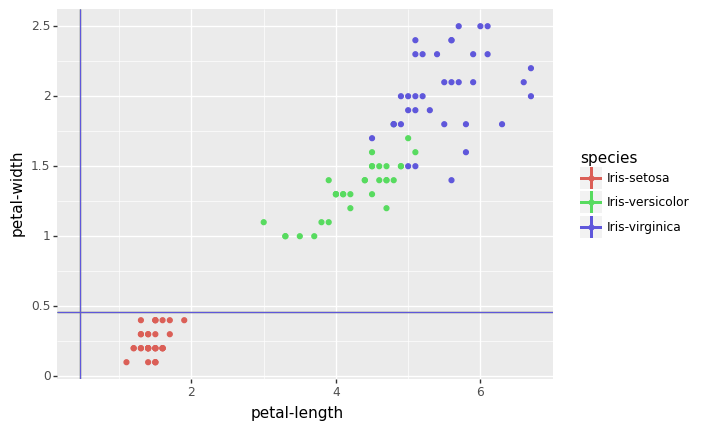

<ggplot: (8739195309653)>

In [309]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train_orig, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train_orig, aes(xintercept=train['sepal-length'].mean(), color='species')) + geom_hline(train_orig, aes(yintercept=train['sepal-length'].mean(), color='species'))

The plot above shows that three columns are enough to distinguish the species. Although, there is still some overlap between Iris-versicolor and Iris-virginica. The sepal width is most likely independent of the other variables while petal length and width seem to be highly correlated. Then all we need is only the petal width and petal length to make our decision tree.

##So here is my proposed decision tree:

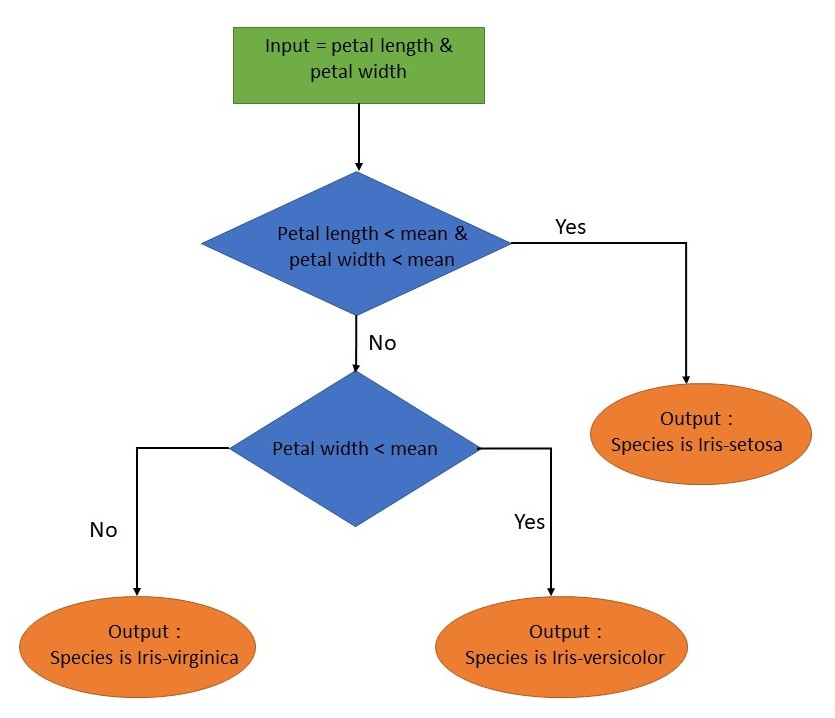

### Coding the decision tree

Let's code the decision tree using the above logic. In the decision tree above, there is no certainty below petal-length so our decision tree will only include petal-width and petal-length.

### Testing the decision tree
Once the decision tree is coded, I will test my model based on the decision tree using the test data set. This will give me the proportion of the data set that was correctly identified.



In [310]:
def get_species(df):
  # ADD CODE HERE TO RETURN None if petal-width is below mean (encoded as 0) or if petal-length is below mean (encoded as 0), otherwise return 'Iris-virginia'
    if df['petal-width'] == 0 and df['petal-length'] == 0:
        return 'iris-setosa'
        if df['petal-width'] == 0:
            return 'iris-versicolor'
    return 'Iris-virginica' 


def predict_proportion(test):
  # use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
  correct = 0
  test_size = test.shape[0]
  for i in range(0, test_size):
    species = get_species_quar(test.iloc[i])
    if species == test.iloc[i]['species']:
      correct += 1
  return correct/test_size

prop_mean = predict_proportion(test)

print ("Proportion correctly identified", prop_mean) 


Proportion correctly identified 0.3111111111111111


Clearly using the mean identifies slightly more than a third of the species (most likely Iris-setosa). However the Iris-virginica and Iris-versicolor do not have a big difference in mean values for petal widths and lengths which is exactly what we see in the results. 

It is time to change the measure for encoding. 

### Change the measure

We were using the mean to act as way of building our decision tree. We can use the decision tree with a different measure - the median.

We start by dividing the test and train data sets again.  


In [311]:
# create the classification variables from the all columns
train_med, test_med = train_test_split(iris_data, test_size=0.30) # By specifying test data proportion tarin data is automatically fixed to 1-test_size
train_med.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.917143,3.091429,3.813333,1.223810
std,0.847333,0.422701,1.828885,0.790633
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.500000,1.300000
75%,6.500000,3.400000,5.200000,1.800000
max,7.700000,4.400000,6.900000,2.500000


In [312]:
# Let's try median

# run the function for each column so that each of the four columns are encoded, then drop the original columns, saving as a new dataframe
train_med['sepal-length'] = train_med.apply(encode, axis=1, key='sepal-length', indicator=train_orig['sepal-length'].median())
train_med['sepal-width'] = train_med.apply(encode, axis=1, key='sepal-width', indicator=train_orig['sepal-width'].median())
train_med['petal-length'] = train_med.apply(encode, axis=1, key='petal-length', indicator=train_orig['petal-length'].median())
train_med['petal-width'] = train_med.apply(encode, axis=1, key='petal-width', indicator=train_orig['petal-width'].median())


Before I decide if median is a good indicator, I would like to look at the gg plot to see if that separates the species enough for me to use it.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


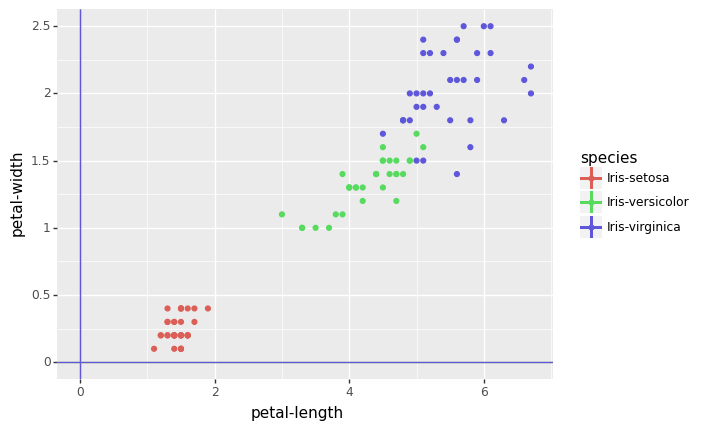

<ggplot: (8739196079977)>

In [313]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train_orig, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train_orig, aes(xintercept=train['sepal-length'].median(), color='species')) + geom_hline(train_orig, aes(yintercept=train['sepal-length'].median(), color='species'))

While the median as an indicator seems to be doing better than the mean, it doesn't seem to do an awful lot better than mean in separating versicolor and virginica. I expect that I will probably get a slightly better percentage of species identified than the mean, but, nothing close to 100%

Using the same functions from before, let's encode and get the above and below median proportions for all 4 features.

In [314]:
# Iris-setosa

set_sl_med = get_prop_above(train_med, 'Iris-setosa', 'sepal-length')
set_sw_med = get_prop_above(train_med, 'Iris-setosa', 'sepal-width')
set_pl_med = get_prop_above(train_med, 'Iris-setosa', 'petal-length')
set_pw_med = get_prop_above(train_med, 'Iris-setosa', 'petal-width')

set_sl_med1 = get_prop_below(train_med, 'Iris-setosa', 'sepal-length')
set_sw_med1 = get_prop_below(train_med, 'Iris-setosa', 'sepal-width')
set_pl_med1 = get_prop_below(train_med, 'Iris-setosa', 'petal-length')
set_pw_med1 = get_prop_below(train_med, 'Iris-setosa', 'petal-width')

#Iris-virginica

vir_sl_med = get_prop_above(train_med, 'Iris-virginica', 'sepal-length')
vir_sw_med = get_prop_above(train_med, 'Iris-virginica', 'sepal-width')
vir_pl_med = get_prop_above(train_med, 'Iris-virginica', 'petal-length')
vir_pw_med = get_prop_above(train_med, 'Iris-virginica', 'petal-width')

vir_sl_med1 = get_prop_below(train_med, 'Iris-virginica', 'sepal-length')
vir_sw_med1 = get_prop_below(train_med, 'Iris-virginica', 'sepal-width')
vir_pl_med1 = get_prop_below(train_med, 'Iris-virginica', 'petal-length')
vir_pw_med1= get_prop_below(train_med, 'Iris-virginica', 'petal-width')

#Iris-versicolor

ver_sl_med = get_prop_above(train_med, 'Iris-versicolor', 'sepal-length')
ver_sw_med = get_prop_above(train_med, 'Iris-versicolor', 'sepal-width')
ver_pl_med = get_prop_above(train_med, 'Iris-versicolor', 'petal-length')
ver_pw_med = get_prop_above(train_med, 'Iris-versicolor', 'petal-width')

ver_sl_med1 = get_prop_below(train_med, 'Iris-versicolor', 'sepal-length')
ver_sw_med1 = get_prop_below(train_med, 'Iris-versicolor', 'sepal-width')
ver_pl_med1 = get_prop_below(train_med, 'Iris-versicolor', 'petal-length')
ver_pw_med1 = get_prop_below(train_med, 'Iris-versicolor', 'petal-width')

In [315]:
#create a dataframe to see the results
sl_ab_med = [set_sl_med, ver_sl_med, vir_sl_med]
sw_ab_med = [set_sw_med, ver_sw_med, vir_sw_med]
pl_ab_med = [set_pl_med, ver_pl_med, vir_pl_med]
pw_ab_med = [set_pw_med, ver_pw_med, vir_pw_med]
sl_bel_med = [set_sl_med1, ver_sl_med1, vir_sl_med1]
sw_bel_med = [set_sw_med1, ver_sw_med1, vir_sw_med1]
pl_bel_med = [set_pl_med1, ver_pl_med1, vir_pl_med1]
pw_bel_med = [set_pw_med1, ver_pw_med1, vir_pw_med1]
iris_med_df = pd.DataFrame(list(zip(species_list, sl_ab_med, sw_ab_med, pl_ab_med, pw_ab_med, sl_bel_med, sw_bel_med, pl_bel_med, pw_bel_med)), columns =['species', 'sepal_length_above_median','sepal_width_above_median','petal_length_above_median','petal_width_above_median','sepal_length_below_median','sepal_width_below_median','petal_length_below_median','petal_width_below_median'])
iris_med_df


,species,sepal_length_above_median,sepal_width_above_median,petal_length_above_median,petal_width_above_median,sepal_length_below_median,sepal_width_below_median,petal_length_below_median,petal_width_below_median
0,Iris-setosa,0.000000,0.653061,0.000000,0.0000,0.750000,0.071429,0.692308,0.631579
1,Iris-versicolor,0.333333,0.081633,0.264151,0.1875,0.229167,0.464286,0.307692,0.368421
2,Iris-viriginica,0.666667,0.265306,0.735849,0.8125,0.020833,0.464286,0.000000,0.000000


Again from the above table, it looks like my decision tree can remain the same, since, iris-setosa has petal lengths and width below median (above median both are 0) and iris-virginica has petal length and width above median (below median they are both 0). Since the decision tree is the same, I can use the same function as before to run my decision tree and test the results. 

In [316]:
prop_median = predict_proportion(test_med)
print ("Proportion correctly identified", prop_median) 

Proportion correctly identified 0.24444444444444444


Median is just slightly better than the mean in identifying the species. Both median and mean are not best indicators.

### Let's try different measures
---

Do the same again but with upper quantile, then again with the lower quantile.  Is it making any difference?  Which give the best looking results?

Starting with dividing train and test data sets.

In [317]:
# create the classification variables from the all columns
train_up, test_up = train_test_split(iris_data, test_size=0.30) # By specifying test data proportion tarin data is automatically fixed to 1-test_size
train_up.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.848571,3.053333,3.764762,1.188571
std,0.862032,0.436346,1.775040,0.750809
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [318]:
# Let's try upper quantile

# run the function for each column so that each of the four columns are encoded, then drop the original columns, saving as a new dataframe
train_up['sepal-length'] = train_up.apply(encode, axis=1, key='sepal-length', indicator=train_orig['sepal-length'].quantile(0.75))
train_up['sepal-width'] = train_up.apply(encode, axis=1, key='sepal-width', indicator=train_orig['sepal-width'].quantile(0.75))
train_up['petal-length'] = train_up.apply(encode, axis=1, key='petal-length', indicator=train_orig['petal-length'].quantile(0.75))
train_up['petal-width'] = train_up.apply(encode, axis=1, key='petal-width', indicator=train_orig['petal-width'].quantile(0.75))

train_up.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,0.247619,0.238095,0.219048,0.209524
std,0.433699,0.427960,0.415585,0.408921
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


Let's see if this is a better indicator than median and/or mean. First, let's look at ggplot for a visual indication.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


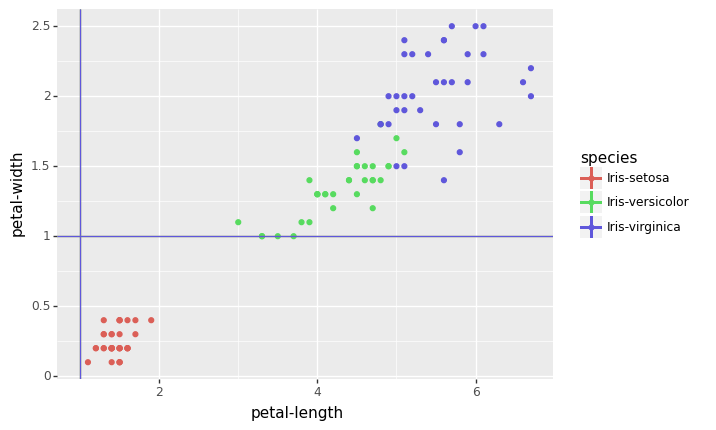

<ggplot: (8739197809945)>

In [319]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train_orig, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train_orig, aes(xintercept=train['sepal-length'].quantile(0.75), color='species')) + geom_hline(train_orig, aes(yintercept=train['sepal-length'].quantile(0.75), color='species'))

Upper quartile is clearly a good idicator for separating Iris-setosa. It is bettter than the median and mean in separating the Iris-versicolor and Iris-virginica. However, still there is some tangled features between these two species. I expect that upper quartile will be slightly better at distingushing the species but not by much. I am not sure using lower quantile will help since most of the tangled data are already above the upper quantile.

Let's do ggplot for the lower quartile.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


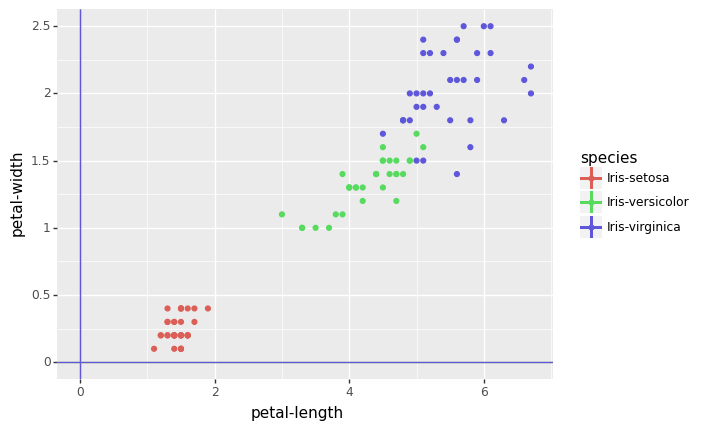

<ggplot: (8739198270909)>

In [320]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train_orig, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train_orig, aes(xintercept=train['sepal-length'].quantile(0.25), color='species')) + geom_hline(train_orig, aes(yintercept=train['sepal-length'].quantile(0.25), color='species'))

As expected, using the lower quantile gives no better than upper quartile to select the species. We may have to try a combination of quartile values to separate iris-virginica and iris-versicolor. 

So let us first try the upper quartile to see how we fare with distinguishing the species.

In [321]:
# Iris-setosa

set_sl_up = get_prop_above(train, 'Iris-setosa', 'sepal-length')
set_sw_up = get_prop_above(train, 'Iris-setosa', 'sepal-width')
set_pl_up = get_prop_above(train, 'Iris-setosa', 'petal-length')
set_pw_up = get_prop_above(train, 'Iris-setosa', 'petal-width')

set_sl_up1 = get_prop_below(train, 'Iris-setosa', 'sepal-length')
set_sw_up1 = get_prop_below(train, 'Iris-setosa', 'sepal-width')
set_pl_up1 = get_prop_below(train, 'Iris-setosa', 'petal-length')
set_pw_up1 = get_prop_below(train, 'Iris-setosa', 'petal-width')

#Iris-virginica

vir_sl_up = get_prop_above(train, 'Iris-virginica', 'sepal-length')
vir_sw_up = get_prop_above(train, 'Iris-virginica', 'sepal-width')
vir_pl_up = get_prop_above(train, 'Iris-virginica', 'petal-length')
vir_pw_up = get_prop_above(train, 'Iris-virginica', 'petal-width')

vir_sl_up1 = get_prop_below(train, 'Iris-virginica', 'sepal-length')
vir_sw_up1 = get_prop_below(train, 'Iris-virginica', 'sepal-width')
vir_pl_up1 = get_prop_below(train, 'Iris-virginica', 'petal-length')
vir_pw_up1= get_prop_below(train, 'Iris-virginica', 'petal-width')

#Iris-versicolor

ver_sl_up = get_prop_above(train, 'Iris-versicolor', 'sepal-length')
ver_sw_up = get_prop_above(train, 'Iris-versicolor', 'sepal-width')
ver_pl_up = get_prop_above(train, 'Iris-versicolor', 'petal-length')
ver_pw_up = get_prop_above(train, 'Iris-versicolor', 'petal-width')

ver_sl_up1 = get_prop_below(train, 'Iris-versicolor', 'sepal-length')
ver_sw_up1 = get_prop_below(train, 'Iris-versicolor', 'sepal-width')
ver_pl_up1 = get_prop_below(train, 'Iris-versicolor', 'petal-length')
ver_pw_up1 = get_prop_below(train, 'Iris-versicolor', 'petal-width')

In [322]:
sl_ab_up = [set_sl_up, ver_sl_up, vir_sl_med]
sw_ab_up = [set_sw_up, ver_sw_up, vir_sw_med]
pl_ab_up = [set_pl_up, ver_pl_up, vir_pl_med]
pw_ab_up = [set_pw_up, ver_pw_up, vir_pw_med]
sl_bel_up = [set_sl_up1, ver_sl_up1, vir_sl_up1]
sw_bel_up = [set_sw_up1, ver_sw_up1, vir_sw_up1]
pl_bel_up = [set_pl_up1, ver_pl_up1, vir_pl_up1]
pw_bel_up = [set_pw_up1, ver_pw_up1, vir_pw_up1]
iris_up_df = pd.DataFrame(list(zip(species_list, sl_ab_up, sw_ab_up, pl_ab_up, pw_ab_up, sl_bel_up, sw_bel_up, pl_bel_up, pw_bel_up)), columns =['species', 'sepal_length_above_upper_quantile','sepal_width_above_upper_quantile','petal_length_above_upper_quantile','petal_width_above_upper_quantile','sepal_length_below_upper_quantile','sepal_width_below_upper_quantile','petal_length_below_upper_quantile','petal_width_below_upper_quantile'])
iris_up_df

,species,sepal_length_above_upper_quantile,sepal_width_above_upper_quantile,petal_length_above_upper_quantile,petal_width_above_upper_quantile,sepal_length_below_upper_quantile,sepal_width_below_upper_quantile,petal_length_below_upper_quantile,petal_width_below_upper_quantile
0,Iris-setosa,0.000000,0.625000,0.000000,0.0000,0.631579,0.105263,0.878049,0.8
1,Iris-versicolor,0.354167,0.125000,0.437500,0.4000,0.280702,0.473684,0.121951,0.2
2,Iris-viriginica,0.666667,0.265306,0.735849,0.8125,0.087719,0.421053,0.000000,0.0


The above results show that
1. Iris-setosa has petal length, petal width and sepal length below upper quartile.
2. Iris-versicolor has petal length and petal width below upper quartile
3. Iris-virginica has all lengths and width more dispersed than the other two species.

##So my decision tree now is:

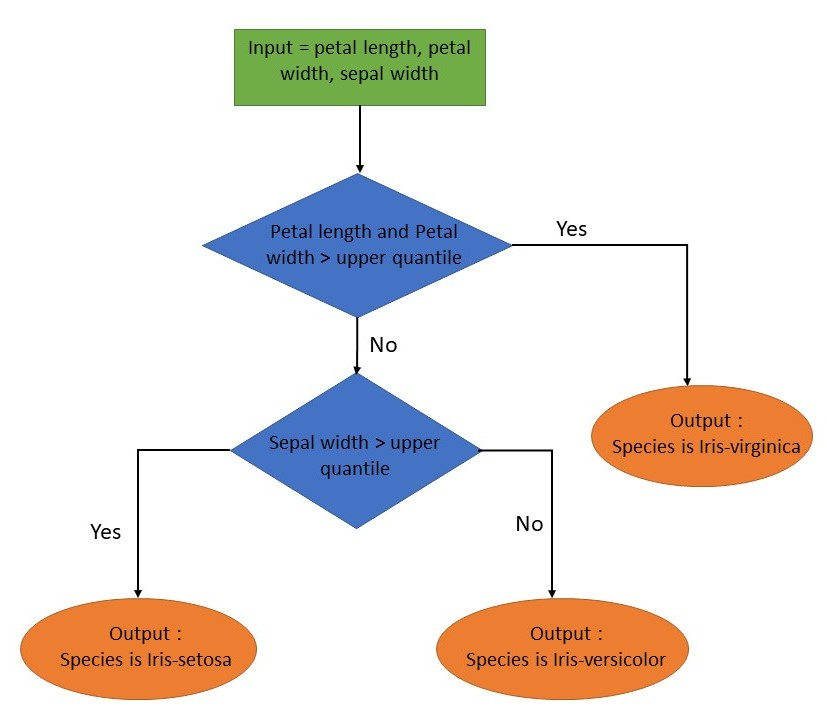

With this in mind, we will have to change our decision tree function get_species to include the changes. Below is the code for the new decision tree and test against our test data. I expect that the upper quartile will be more accurate compared to mean and median models. I will check if my model is correct with this expected outcome that proportion of data identified correctly using upper quartile will be more than that of mean and median as well.

In [323]:
def get_species_quar(df):
  # ADD CODE HERE TO RETURN None if petal-width is below mean (encoded as 0) or if petal-length is below mean (encoded as 0), otherwise return 'Iris-virginia'
    if df['petal-width'] == 0 and df['petal-length'] == 0:
        return 'iris-setosa'
        if df['sepal-width'] == 0:
            return 'iris-versicolor'
    return 'Iris-virginica' 

# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct

prop_up = predict_proportion(test_up)

if prop_up > prop_mean and prop_up > prop_median:
  print("Expected model works correctly with", prop_up, "proportion correctly identified")
else:
  print("Expected upper quartile model to be more accurate than", prop_mean, "and", prop_median, "but got", prop_up)


Expected model works correctly with 0.3333333333333333 proportion correctly identified


This fares better than mean and median! 

So far, from what I have seen 
1. Mean and median have the same decision tree.
2. Median and mean provide very similar results are good indicator to separate Iris-setosa. But Iris-versicolor and Iris-virginia are still confounded together.
3. The decision tree has to change for upper-quartile.
4. Using upper-quratile as an indicator gives better results than mean and median but only around 50% of the data are correctly identified.

If one is interested in separating the 3 species succesfully a combination of indicators might be necessary. For example, use median to identify setosa, remove them, and use another indicator or combination of indicators to separate virginica and versicolor.

Another option would be to use logistic regression to separate the species. 

##**Using Logistic Regression:**

Given that the data looks like each of the species can be separated by a line (see gg-plot), as long as the lines are not exactly flat, I would like to try and use logistic regression which allows for sigmoidal fit instead of linear fit to separate the 3 species.

For further reading and references on how Logistic regression is used in Biological and social sciences, see,
https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc


#Logistic Regression for Iris data
---
I found further information on how to use logistic regression to Iris data at 
https://www.pluralsight.com/guides/designing-a-machine-learning-model

This method uses the same test and train split of data to test a machine learning model that uses logistic regression to identify the Iris species using sklearn package. For this method, we have to go back to the original iris data set from UCI database. Fortunately, this data is available in sklearn. So let's first import sklearn and then the dataset. 

In [324]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import numpy as np

Let us start by splitting the data again into train and test sets. 

Before we go back to doing the model building using train and testing out the model using test data set, we need to reshape our dataset for the logistic regression. We start with defining the X values as the 4 columns which are the features and our y-value of interest is the species column.

In [325]:
# Number of examples
m = iris_data.shape[0]
# Features
n = 4
# Number of classes
k = 3

X = np.ones((m,n + 1))
y = np.array((m,1))
X[:,1] = iris_data['petal-length'].values
X[:,2] = iris_data['petal-width'].values
X[:,3] = iris_data['sepal-length'].values
X[:,4] = iris_data['sepal-width'].values

# Labels
y = iris_data['species'].values

Next we split the data set into train and test data like we did before in the same ratio 70% and 30% respectively. But we do it for both X and y variables this time. 

In [326]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)
# it shows 70% of data is split for training and 30% of the data goes to testing.

X = iris_data.drop(['species'], axis=1)
y = iris_data['species']
#print(X.head())
print(X_train.shape)
#print(y.head())
print(y_test.shape)

(105, 5)
(45,)


Using the logistic regression package from sklearn, we define a model_logreg. Then we apply the model to our X_train and y_train (which we had split above). We use the model to fit our data using .fit() with x_train are the training vectors and y is the target values as input to the .fit() function. The .predict() function will essentially use the learned parameters by .fit() to perform predictions on new, unseen test data points.

For more information on .fit() and .predict(), see https://towardsdatascience.com/fit-vs-predict-vs-fit-predict-in-python-scikit-learn-f15a34a8d39f

To check the accuracy of our model predictions, we use .accuracy_score to pass the test data set and predicted data set from the model fit on test data.

In [327]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)
y_pred = model_logreg.predict(X_test)
print('Test Accuracy for Scikit-Learn model:', metrics.accuracy_score(y_test, y_pred)* 100,'%')

Test Accuracy for Scikit-Learn model: 93.33333333333333 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Our results show an accuracy of 93.33% using logistic regression model. The sklearn logistic regression model took less processing time and way more accurate in identifying the species compared to my decision making tree model. However, decision making tree is a great starting point and most likely would be the first method when it comes to building decision making algorithms. The train and test data is a great way to test out any model and should be part of model building process.

#Conclusion
---

This definetely is a very interesting project and can be considered as a beginning level understanding of how pandas can be very useful for identifying and classifying new species. It will easily be a Machine learning project too. The use of train and test method, to separate the data randomly, and using train data to build a decision tree that is then used to test my model is a very efficient way to make sure that model works not just with this particular data set but for any data. Clearly the single indicator models explored in this project doesn't do very well even in the train data. It needs more than 1 indicator and/or machine learning methods. The logical regression model was very quick and more accurate. In both these instances use of train and test data sets are a great way to test models' accuracy against any data.